In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import power_anova 

In [93]:
#data prep 

data = pd.read_csv('PTSD_filtered.csv')

## to create a varaible for age at sefla and consequently create a binary varaiable for young or not
data['dob'] = pd.to_datetime(data['dob'])
data['date'] = pd.to_datetime(data['date'])
data['age_at_sefla'] = None

for idx, row in data.iterrows():
    if row['day'] == 'sefla':
        data.at[idx, 'age_at_sefla'] = (row['date'] - row['dob']).days / 7
    else:
        sefla_row = data[(data['cohort_id'] == row['cohort_id']) & (data['day'] == 'sefla')]
        if not sefla_row.empty:
            data.at[idx, 'age_at_sefla'] = sefla_row.iloc[0]['age_at_sefla']

data['age_at_sefla'] = data['age_at_sefla'].astype(float)

data['young'] = (data['age_at_sefla'] < 12).astype(str)

## subsetting data
subset_data = data[data['day'] != 'sefla']
experimental_group = subset_data[subset_data['condition'] == 'sefl']
control_group = subset_data[subset_data['condition'] == 'control']

/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_23039/3043508519.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dob'] = pd.to_datetime(data['dob'])
/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_23039/3043508519.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


Text(0.5, 1.0, 'Sex Distribution')

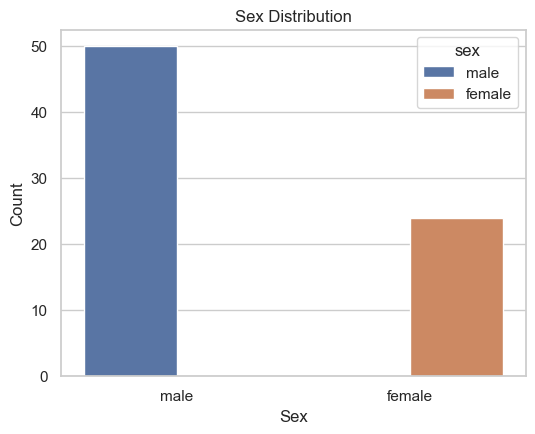

In [124]:
#figure 1a
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="sex", hue="sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Sex Distribution by Conditions')

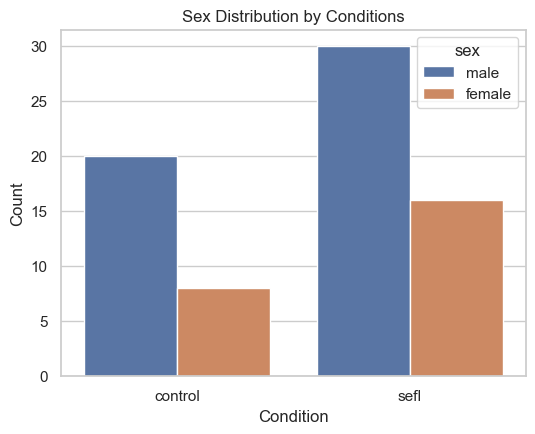

In [127]:
#figure 1b
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="sex")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Sex Distribution by Conditions')

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


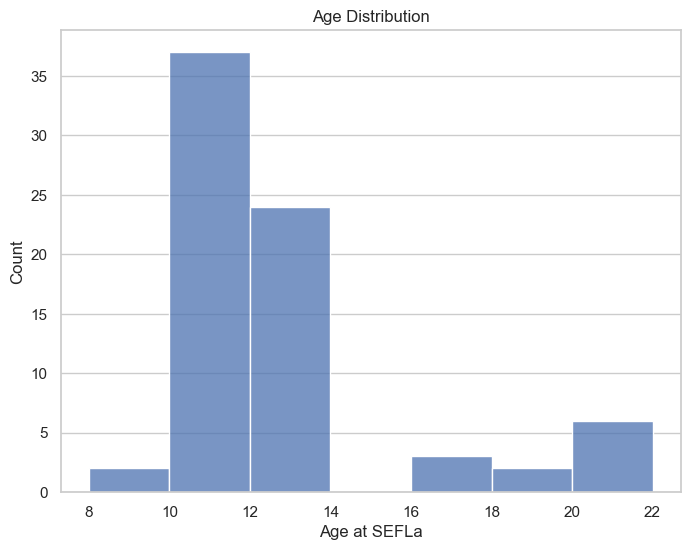

In [123]:
#figure 1c
# Plot the combined histogram and KDE plot
bins = [8, 10, 12, 14, 16, 18, 20, 22]
plt.figure(figsize=(8, 6))
sns.histplot(data[data['day'] == 'sefla']['age_at_sefla'], bins=bins, color="#4c72b0", zorder=2)
plt.xlabel('Age at SEFLa')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='-', zorder=1)  # Optional: Customize the style of the horizontal line
plt.grid(axis='x', color='none')  # Remove vertical grid lines
plt.show()

Text(0.5, 1.0, 'Age Distribution by Conditions')

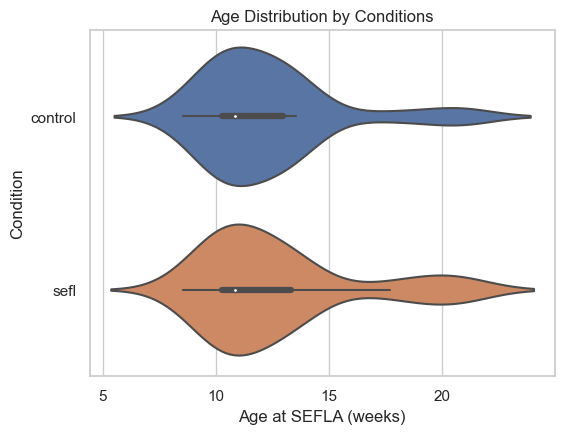

In [126]:
#figure 1d
plt.figure(figsize=(6, 4.5))
sns.violinplot(data=data[data['day'] == 'sefla'], x='age_at_sefla', y='condition')
plt.xlabel('Age at SEFLA (weeks)')
plt.ylabel('Condition')
plt.xticks(ticks=range(5, int(data['age_at_sefla'].max()) + 5, 5))
plt.title('Age Distribution by Conditions')

Text(0.5, 1.0, 'Young/Old Distribution by Conditions')

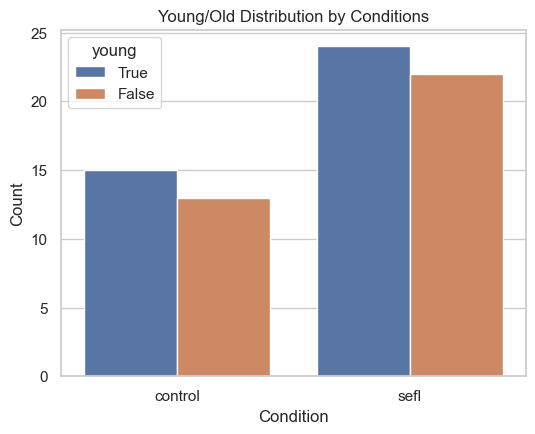

In [128]:
#figure 1e
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="young")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Young/Old Distribution by Conditions')

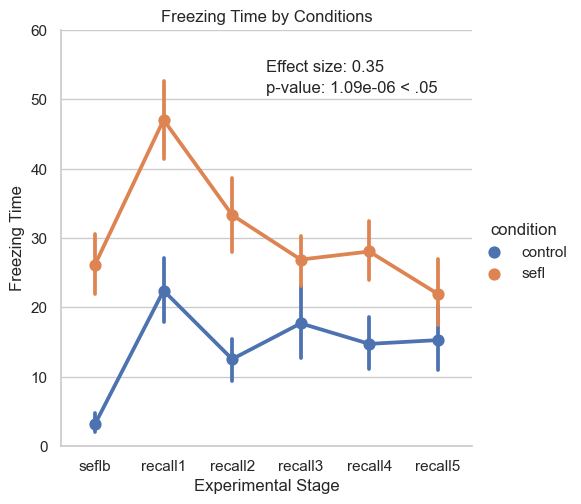

In [174]:
#figure 2a
sns.catplot(kind='point', join=True, data=subset_data, x='day', y='freezing', hue='condition')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Conditions')
effect_size = 0.353210
pvalue = 1.093325e-06
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)
plt.show()

# p_value = 1.093325e-06
# effect_size(np2) = 0.353210

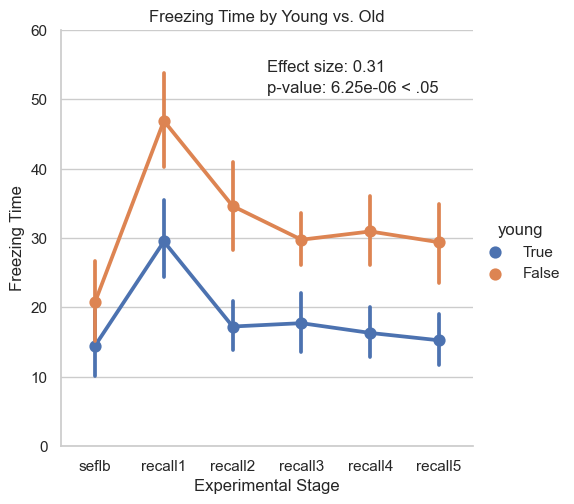

In [173]:
#figure 2b
sns.catplot(kind='point', join=True, data=subset_data, x='day', y='freezing', hue='young')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Young vs. Old')
effect_size = 0.312284
pvalue = 6.249053e-06
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)
plt.show()
# p_value = 6.249053e-06
# effect_size(np2) = 0.312284

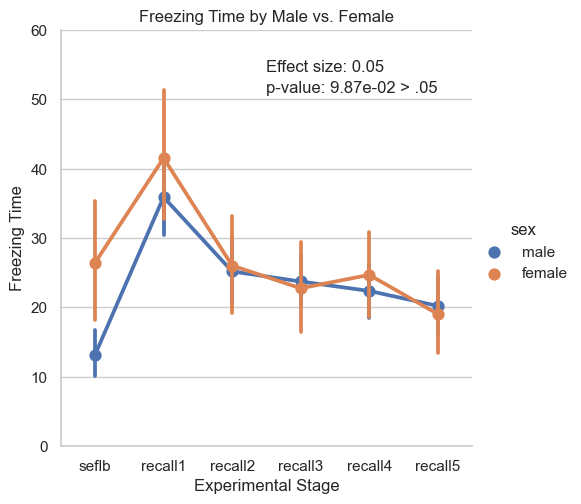

In [170]:
#figure 2c
sns.catplot(kind='point', join=True, data=subset_data, x='day', y='freezing', hue='sex')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Male vs. Female')
effect_size = 0.048790
pvalue = 9.870660e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)
plt.show()
# p_value = 9.870660e-02
# effect_size(np2) = 0.048790

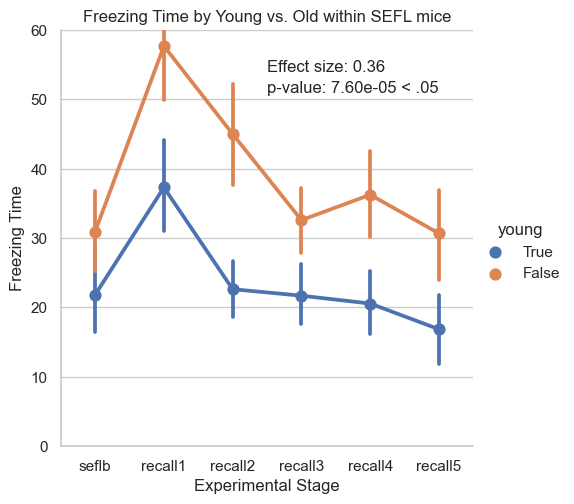

In [172]:
#figure 3a
sns.catplot(kind='point', join=True, data=experimental_group, x='day', y='freezing', hue='young')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Young vs. Old within SEFL mice')
effect_size = 0.356433
pvalue = 7.599005e-05
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)
plt.show()

# p_value = 7.599005e-05
# effect_size(np2) = 0.356433

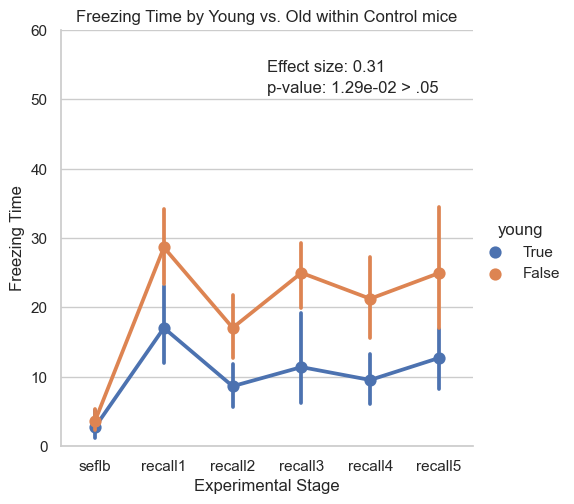

In [175]:
#figure 3b
sns.catplot(kind='point', join=True, data=control_group, x='day', y='freezing', hue='young')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Young vs. Old within Control mice')
effect_size = 0.312203
pvalue = 1.289142e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)
plt.show()

# p_value = 1.289142e-02
# effect_size(np2) = 0.312203

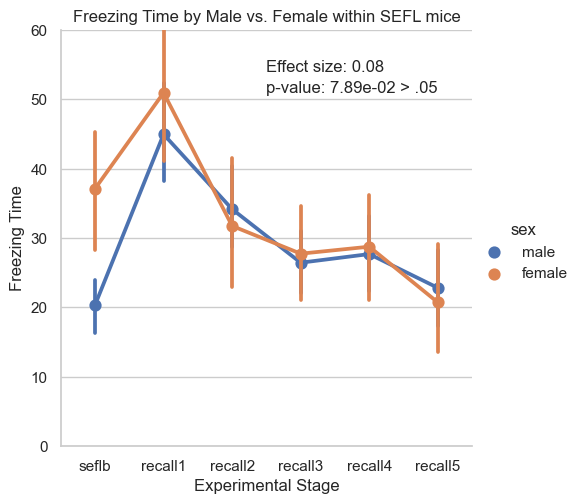

In [176]:
#figure 4a
sns.catplot(kind='point', join=True, data=experimental_group, x='day', y='freezing', hue='sex')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Male vs. Female within SEFL mice')
effect_size = 0.083276
pvalue = 7.890522e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)
plt.show()

# p_value = 7.890522e-02
# effect_size(np2) = 0.083276

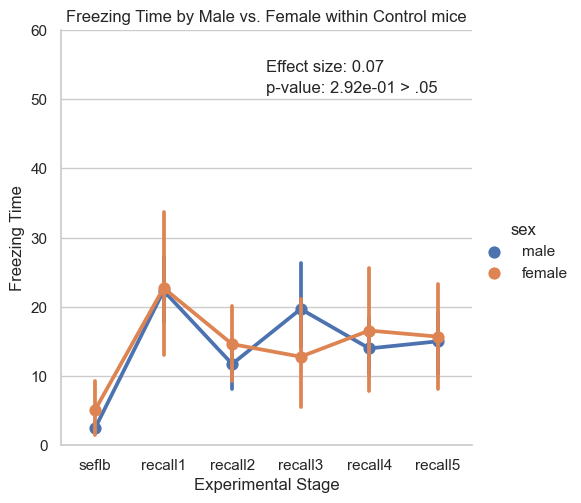

In [177]:
#figure 4b
sns.catplot(kind='point', join=True, data=control_group, x='day', y='freezing', hue='sex')
ax = plt.gca()
ax.set_ylim([0, 60])
plt.xlabel('Experimental Stage')
plt.ylabel('Freezing Time')
plt.title('Freezing Time by Male vs. Female within Control mice')
effect_size = 0.065058
pvalue = 2.919367e-01
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)
plt.show()

# p_value = 2.919367e-01
# effect_size(np2) = 0.065058

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0.5, 1, 'Kernel Density Estimation Freezing vs. Age by Sex')

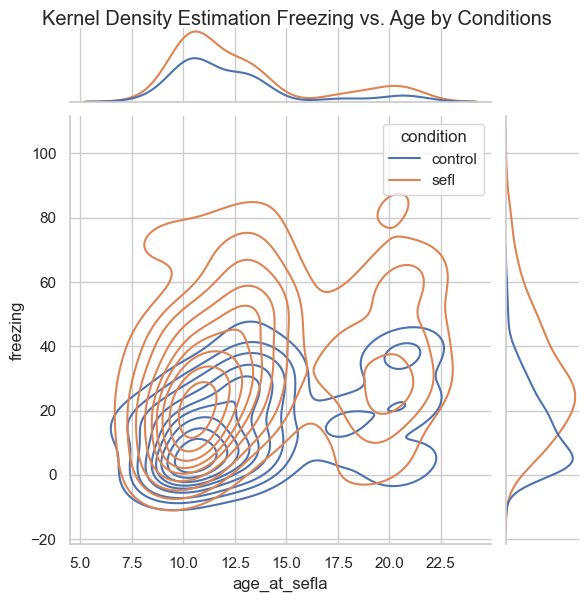

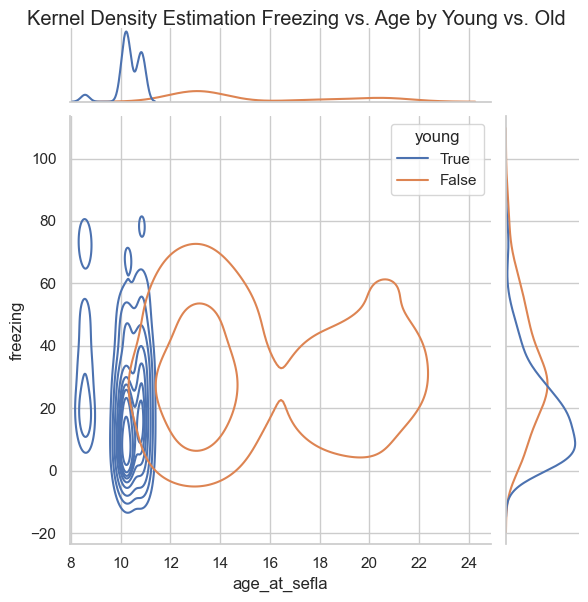

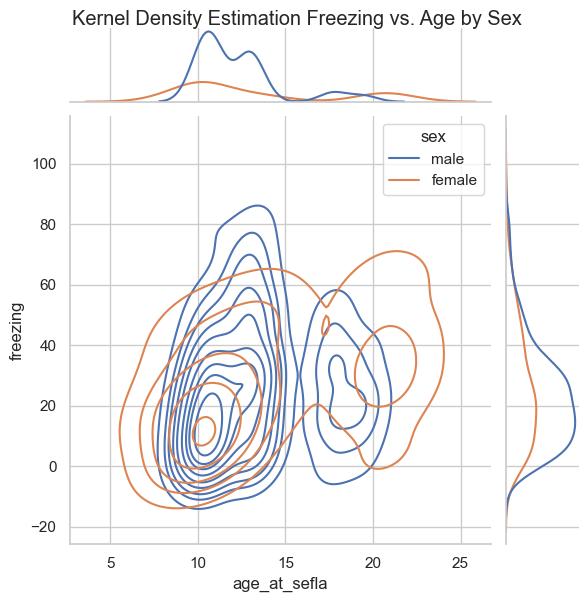

In [219]:
# additional plots 
sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="condition",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Conditions', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="young",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Young vs. Old', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="sex",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Sex', y=1)
